在实证分析中，对于一个内涵较为丰富的变量，我们往往会构建一个综合评价指标体系进行测度。比如今年大火的新质生产力，很多学者从新质劳动者、新质劳动对象和新质劳动资料出发建立一级指标，又在一级指标体系下再分别建立二级乃至三级指标，形成多维综合评价指标体系。这种评价指标体系的构建方式带来了一个问题，如何确定各指标体系之间的权重呢？有一种解决办法叫做专家打分，也就是由多位专家进行赋权，然后再取专家赋权的均值。这种方式有它的优点，但人的主观性不可避免的会影响评价结果。有没有什么方法可以避免人的主观性呢？这个答案就是熵值法。要理解熵值法，我们首先要理解信息量和信息熵。

# 信息量和信息熵

信息量可以简单理解为一个事件发生带来的信息含量。信息量与事件发生的概率成反比，这意味越平常的事件发生带来的信息量越低，而不寻常的事件发生带来的信息量越高。比如我告诉你，明天太阳从东边升起，你会觉得我在说废话，即话里没有信息量。如果我告诉你一件你不知道的八卦，你会觉得我说的内容信息量爆炸，而八卦也就是生活中不常见的事儿。在信息论中，对于一个事件 $𝑋=𝑥_𝑖$，它的信息量 $I(x_i)$ 定义为：

$$
I(x_i) = -log_{2}p(x_i)
$$

其中，$p(x_i)$ 是事件 $x_i$ 发生的概率。

信息熵（Entropy）随机事件信息量的期望。对于一个随机事件 $X$，其信息熵 $H(X)$ 定义为：

$$
H(X) = -\sum_{i=1}^{n}p(x_i)log_{2}p(x_i)
$$

我们可以发现，当$X$ 是确定性的时候，信息熵 $H(x)$ 取最小值 0。当 $X$ 服从均匀分布的时候，信息熵 $H(X)$ 取最大值 $log_{2}n$。在这种情况下，随机变量 $X$ 等可能取到每一个值，系统完全不可预测。因此，信息熵可以测度系统的不确定性，系统的不确定性越大，信息熵越大，反之信息熵越小。

# 熵值法

对于一个指标而言，如果它的取值离散程度非常小，代表各个样本之间的差异很小，那么该指标对于整体评价体系而言相对影响较小。极端一点，如果一个指标各样本取值相同，比如考虑性别这个指标，所有的样本均为男性，那我们就没有必要将这个指标纳入评价体系了。因此，指标的离散程度，或者说指标在不同样本之间的差异性在一定程度上反映了指标对于评价体系的重要性。而信息熵可以很好的度量指标在不同样本之间的差异性。当一个指标的熵值较高时，意味着该指标的各个样本之间的数值分布较为均匀，即各个样本在该指标上相似。这种情况下，该指标对于区分不同样本的能力较弱，因此我们认为它提供的有用信息量较少。当一个指标的熵值较低时，意味着该指标的各个样本之间的差异较大，数值分布不均匀。这表明该指标对不同样本有较好的区分能力，能够提供更多的有用信息量，因此在综合评价中应当给予更大的权重。因此，我们可以通过计算各指标的信息熵来进行赋权，而这不涉及人的主观判断。

考虑 m 个待评价的样本和 n 项指标，形成原始指标数据矩阵：

$$
X = 
\left(
\begin{matrix}
X_{11} & X_{12} & \cdots & X_{1n} \\
X_{21} & X_{22} & \cdots & X_{2n} \\
\vdots & \vdots & \vdots & \vdots \\
X_{m1} & X_{m2} & \cdots & X_{mn} \\
\end{matrix}
\right)
$$

其中，$X_{ij}$ 代表第 $i$ 个样本第 $j$ 项指标的评价数值。使用熵值法对原始指标数据矩阵进行测度，基本步骤如下：

- 数据预处理

为消除各原始指标值数量和量纲差异带来的影响，在对指标进行赋权操作前,需要先对原始指标数据进行预处理。文献中多采用极差标准化处理（朱喜安、魏国栋，2015）。对于**正向指标**，即在评价时该指标越大越好：

$$
x_{ij} = \frac{X_{ij} - min(X_j)}{max(X_j) - min(X_j)}
$$

对于**负向指标**，即在评价时该指标越小越好：

$$
x_{ij} = \frac{max(X_j) - X_{ij}}{max(X_j) - min(X_j)}
$$

- 计算信息熵

计算第 $j$ 个评价指标的信息熵，首先需要计算每个样本标志值的比重 $\omega_{ij}$：

$$
\omega_{ij} = \frac{x_{ij}}{\sum_{i=1}^{m}x_{ij}}
$$

注意，这里的比重 $\omega_{ij}$ 不是严格意义上的概率，但它在形式上与概率分布相似，可以被视为该样本在指标 $j$ 下的重要性“概率”。然后，计算指标 $j$ 的信息熵 $e_j$：

$$
e_j = -\frac{1}{logm}\sum_{i=1}^{m}\omega_{ij}log\omega_{ij}
$$

这里除以 $logm$ 是为了对熵值进行归一化处理，确保熵值的范围在 [0, 1] 之间。

- 计算差异性系数

什么是差异性系数，为什么有了信息熵还要计算差异性系数，要回答这两个问题我们要再回顾一下信息量和信息熵的概念。在信息论中，信息熵是随机变量所提供的平均信息量的度量。熵值较高表示该随机变量具有较大的不确定性，即在不同可能结果之间的选择越多，因此平均而言，观察该变量时获得的信息量就越大。但需要注意的是，在熵值法中，“信息量”有一个特定的解读，它并不仅仅指信息论中的“平均信息量”，而是更多地指这个指标在样本之间的“差异性”或“区分能力”。差异性系数的引入，是为了将信息熵的这个意义逆转过来：信息熵较低时，差异性系数较高，说明这个指标的区分能力较强，对系统的不确定性有更大的减少作用，提供的信息量更“有用”。因此在熵值法中，差异性系数更直接地反映了一个指标的重要性。

$$
g_j = 1 - e_j
$$

- 计算指标权重
  
$$
\lambda_j = \frac{g_j}{\sum_{j=1}^{n}g_j}
$$

- 计算综合得分

$$
S_i = \sum_{j=1}^{n}\lambda_j x_{ij},i=1,2,\cdots,m
$$


# Python代码实现

In [1]:
import numpy as np
import pandas as pd
from typing import Tuple

def standardize(data: pd.DataFrame, flags: list, offset=0.0001) -> pd.DataFrame:
    """对数据进行标准化

    Args:
        data (pd.DataFrame): 待标准化数据
        flags (list): 指标正向或者反向标识，例如["+", "-", "+"]
        offset (float): 偏移量，默认为 0.0001

    Returns:
        pd.DataFrame: 标准化后的数据
    """    
    standardized_list = []
    for i, flag in enumerate(flags):
        if flag == "+":
            standardized_feature = (
                (data.iloc[:, i] - data.iloc[:, i].min())
                / (data.iloc[:, i].max() - data.iloc[:, i].min())
            ) + offset
            standardized_list.append(standardized_feature)
        else:
            standardized_feature = (
                (data.iloc[:, i].max() - data.iloc[:, i])
                / (data.iloc[:, i].max() - data.iloc[:, i].min())
            ) + offset
            standardized_list.append(standardized_feature)
    standardized_df = pd.concat(standardized_list, axis=1)

    return standardized_df

def entropy_weight(data: pd.DataFrame, flags: list, offset=0.0001) -> Tuple[list, pd.DataFrame]:
    """对于给定的输入数据，计算熵权法综合得分，以及对应的权重

    Args:
        data (pd.DataFrame): 输入原始数据
        flags (list): 指标正向或者反向标识，例如["+", "-", "+"]
        offset (float): 偏移量，默认为 0.0001

    Returns:
        Tuple[list, pd.DataFrame]: 权重；处理后的数据
    """    
    standardized_df = standardize(data, flags, offset)
    p = standardized_df / standardized_df.sum().values
    g_list = []
    for feature in p.columns:
        entropy = sum(p.loc[:, feature] * np.log2(p.loc[:, feature])) * (
            -1 / np.log2(p.shape[0])
        )
        g = 1 - entropy
        print(f"{feature}熵值为：{entropy}；差异性系数为{g}")
        g_list.append(g)
    weight = g_list / sum(g_list)
    score = np.dot(standardized_df.values, np.array(weight)).round(4)
    score_df = pd.DataFrame(score, index=data.index, columns=["综合得分"])

    return weight, score_df

In [2]:
import matplotlib.pyplot as plt
from numpy.random import default_rng

rng = default_rng(12345)

In [49]:
# 测试样本
df = pd.DataFrame({
    "新质劳动力": rng.uniform(0, 1, 100),
    "新质劳动对象": rng.binomial(1, 0.5, 100),
    })

In [50]:
df

,新质劳动力,新质劳动对象
0,0.958712,0
1,0.083186,1
2,0.184418,0
3,0.370891,1
4,0.914208,1
...,...,...
95,0.614658,1
96,0.621998,0
97,0.453705,0
98,0.379921,0


<Axes: >

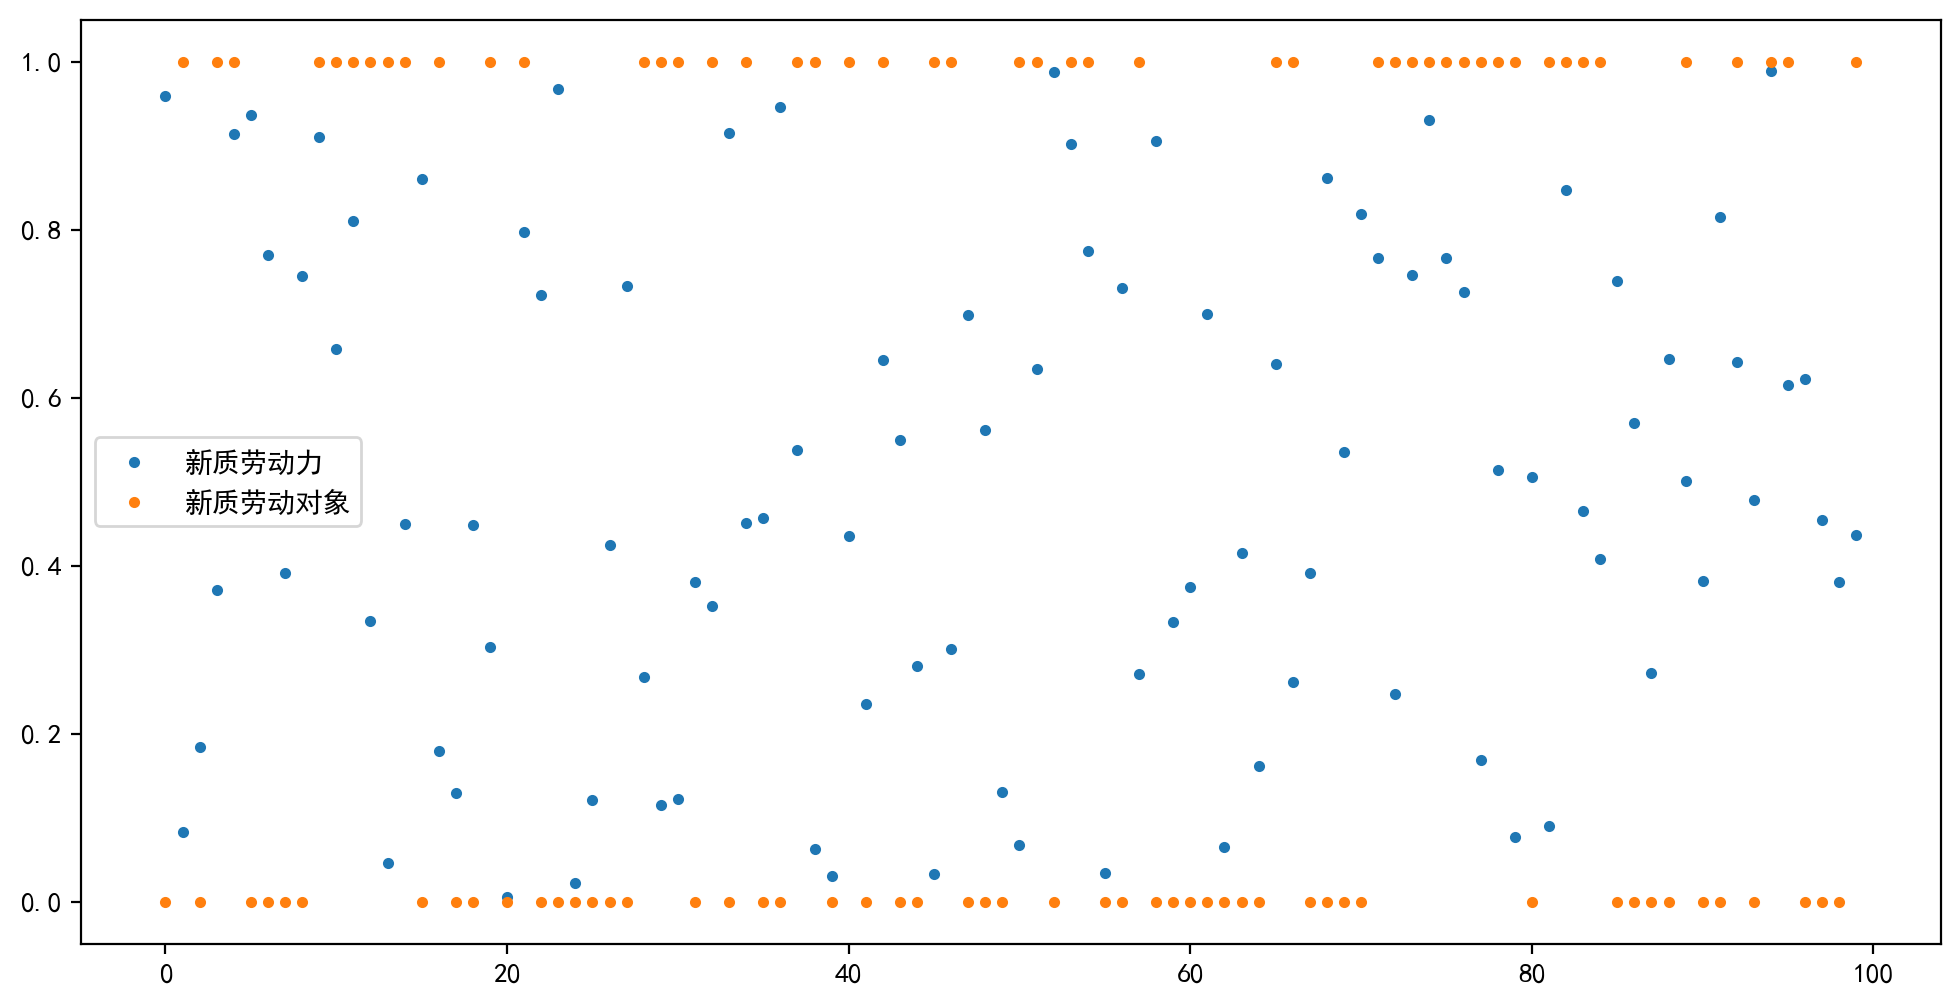

In [51]:
fig, axs = plt.subplots(1, 1, figsize=(12,6), dpi=200)
df.plot(ax=axs, linestyle="none", marker=".")

In [53]:
weight, score_df = entropy_weight(df, ["+", "+"])

新质劳动力熵值为：0.955955464314207；差异性系数为0.04404453568579303
新质劳动对象熵值为：0.8408607632351521；差异性系数为0.15913923676484787


In [54]:
score_df

,综合得分
0,0.2103
1,0.8005
2,0.0396
3,0.8639
4,0.9837
...,...
95,0.9177
96,0.1361
97,0.0990
98,0.0827


# 参考资料

- 朱喜安,魏国栋.熵值法中无量纲化方法优良标准的探讨[J].统计与决策,2015,(02):12-15.